## Simulation und Modellierung WS 17/18 Uebung 07 : 
### Methode der kleinsten quadratischen Abweichungen

### <u>Aufgabe 1</u>

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen entweder Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder die matplotlib Funktion `mpl.contour(X,Y,f(X,Y),[1.0])` mit `X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))`, um die Hoehenlinie $f(X,Y)=1$ darzustellen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

In [3]:
from pylab import *
%matplotlib inline

Der Kegelschnitt ist eine geschlossene Kurve


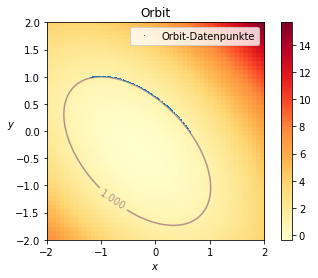

In [84]:
############################################################################################
# Aufgabenteil 1: Finde die Koeffizienten A,B,C,D,E                                        #
############################################################################################

# Hier werden Informationen aus der Datei orbit.dat geladen
data = np.loadtxt('orbit.dat') # lädt die x- und y-Werte der datei orbit.dat in das array
                               # data
N = data.shape[0]              # N ist die Anzahl der x- bzw. der y-Werte
x = data[:,0]                  # die x-Werte der datei orbit.dat bilden den Vektor x
y = data[:,1]                  # die y-Werte der datei orbit.dat bilden den Vektor y


# Hier wird aus den x- und y-Werten eine Matrix A erstellt
A = np.zeros(5*N)              # A ist ein Vektor mit Nullen der Länge 5*N
A.shape = (N,5)                # A wird umgewandelt in eine Matrix mit N Zeilen und
                               # 5 Spalten, eine für jeden der Koeffizienten A,B,C,D,E
A[:,0] = x**2                  # in der ersten Spalte sind die x-Werte quadriert
A[:,1] = x * y                 # in der zweiten Spalte werden x und y multipliziert
A[:,2] = y**2                  # in der dritten Spalte sind die y-Werte quadriert
A[:,3] = x                     # in der vierten Spalte sind die x-Werte
A[:,4] = y                     # in der fünften Spalte sind die y-Werte


# Hier werden der Vektor b und die transponierte Matrix A_trans erstellt
# die wir zum loesen des Gleichungssystems A*c = b brauchen
b = np.ones(N)                 # erstellt den Vektor b der Laenge N voll mit einsen
A_trans = A.transpose()        # erstellt die transponierte Matrix A_trans von A


# Hier werden der Vektor b_new und die Matrix A_new erstellt
# die wir zum loesen des Gleichungssystems A_trans * A *c = A_trans * b brauchen
A_new = A_trans.dot(A)              # erstellt die Matrix A_new als Matrixprodukt der
                                    # der transponierten Martrix A_trans und A
b_new = A_trans.dot(b)              # erstellt den Vektor b_new durch anwenden der
                                    # transponierten Matrix A_trans auf b

    
# Hier wird das lineare Gleichungssystem A_trans * A *c = A_trans * b  bzw. 
# A_new * c = b_new  nach c aufgeloest. Die Elemente des Vektors c sind die Koeffizienzen
# A,B,C,D,E
c = np.linalg.solve(A_new,b_new)    # definiert den Vektor c als die Loesung des linearen
                                    # Gleichungssystems A_new * c = b_new

    
############################################################################################
# Aufgabenteil 2: Ist der Kegelschnitt offen oder geschlossen                              #
############################################################################################

# Definiert die Prüfsumme Anhand der Formel in der Aufgabenstellung B^2 - 4AC
# und überprüft anhand dieser, ob der Kegelschnitt eine offene Kurve, eine Parabel oder 
# eine Hyperbel ist
pruef = c[1]**2 - 4 * c[0] * c[2]                         # definiert die Prüfsumme anhand
                                                          # der Formel B^2 -4AC
if pruef < 0:                                             # Wenn die Prüfsumme kleiner als
    print("Der Kegelschnitt ist eine geschlossene Kurve") # 0 ist -> geschlossene Kurve
elif pruef == 0:                                          # Wenn die Prüfsumme gleich 0
    print("Der Kegelschnitt ist eine Parabel")            # ist -> Parabel
else:                                                     # Sonst -> Hyperbel
    print("Der Kegelschnitt ist eine Hyperbel")           # 

############################################################################################
# Aufgabenteil 3: Zeichnen Sie alle Kurven, die die Kegelschnittgleichung erfuellen        #
############################################################################################   

# Hier werden 2d-Felder von x- und y-Werten erstellt sowie die Funktion f(x,y) 
X,Y = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))       # Die numpy Funktion 
                                                             # meshgrid(x,y) wird benutzt, 
                                                             # um aus zwei Containern mit 
                                                             # x- und y-Werten zwei 
                                                             # 2d Arrays X und Y zu 
                                                             # erstellen
f = c[0] * X**2 + c[1] * X * Y + c[2] * Y**2 + c[3] * X + c[4] * Y  # definiert f in
                                                                    # abhängigkeit von 
                                                                    # X und Y
    
# Hier werden nun f und die y-Werte der Datei orbit.dat geplottet
fig1, ax1 = plt.subplots(ncols=1,nrows=1)    # erstellt die figure und axes
plt.title("Orbit")                           # gibt der Axes den Titel: "Orbit"
plt.xlabel('$x$')                            # gibt der Axes das Label für die x-Achse: x
plt.ylabel('$y$', rotation=0)                # gibt der Axes das Label für die y-Achse: y
# plottet f im Bereich von X = [-2,2] und Y = [-2,2] mit der colormap "YlOrRd"
plt.imshow(f,interpolation='none',origin='lower',extent=[-2,2,-2,2],cmap="YlOrRd")
colorbar()                                   # fügt eine Farbskalar ein
cp = plt.contour(X,Y,f,[1.0], alpha=0.4)     # definiert die Höhenlinie beim Wert f(x,y)=1
clabel(cp)                                   # Label fuer Contour Plots
plot(x,y,',', label="Orbit-Datenpunkte")     # plottet die y- gegen die x-Werte der Datei
                                             # orbit.dat
legend()                                     # fügt die Legende ein
# Speichert die figure als pdf-Datei "Orbit.pdf"
fig1.savefig("Orbit.pdf", facecolor='w', edgecolor='w', format='pdf', transparent=False)
show()                                       # zeichnet die Graphen etc.

### <u>Zusatzaufgabe</u>

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Feldern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen. *Hinweis* : `np.random.randn(N)` generiert ein Feld mit N standard normalverteilten Zufallszahlen)
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.

In [109]:
############################################################################################
# Aufgabenteil 1: Schreiben sie eine Funktion polyfit(x,y,N=0)                             #
############################################################################################

# Die folgende Funktion mypolyfit gibt für gegebene x- und y-Werte die Koeffizienten eines
# Polynoms N-ten Grades, welches die Summe der quadratischen Abweichungen minimiert,
# ausgibt.
def mypolyfit(x,y,N=0) :
    L=len(x)                          # Sei L die Anzahl an x- bzw. y-Werten
    b = y                             # Sei b der Vektor der y-Werte
    A = np.zeros((L,N+1))             # Sei A eine Matrix mit L Zeilen und N Spalten
    for k in range(N+1) :             # In einer Spalte k der Matrix A kommen werden 
        A[:,k] = x**k                 # aufgeschrieben die Werte x zur Potenz k
    
    A_trans = A.transpose()           # Sei A_trans die transponierte Matrix von A
    A_new = A_trans.dot(A)            # Sei A_new das Matrixprodukt von A_trans und A  
    b_new = A_trans.dot(b)            # Sei b_new das Ergebnis der Anwendung der
                                      # Matrix A_trans auf b
                                   
    c = np.linalg.solve(A_new,b_new)  # Sei c der Vektor der Koeffizienten die das 
                                      # lineare Gleichungssystem loesen
    return c                          # gibt den Vektor c zurück

# Die folgende Funktion macht aus einem gegeben Koeffizienten-Vektor c und x-Werten
# die y-Werte eines Polynoms dessen Grad der Länge von c entspricht
def polycalc(c,x) :
    N=len(c)              # N ist die Länge des Koeffizienten-Vektors
    p = np.zeros(x.shape) # p ist ein Vektor mit Nullen, mit den selben 
                          # Dimensionen wie x
    for k in range(N) :   # Diese For-Schleife kombiniert Koeffizienten und x-Werte
        p+=c[k]*x**k      # zu den y-werten, hier p
    return p              # gibt p zurück

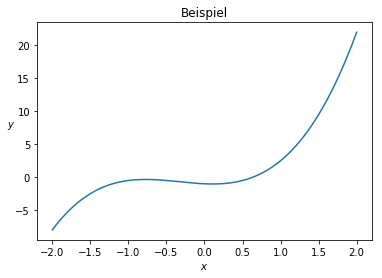

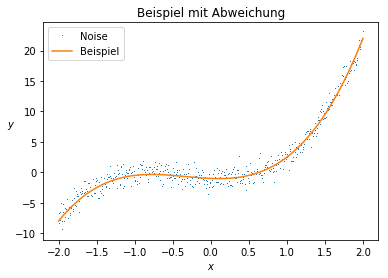

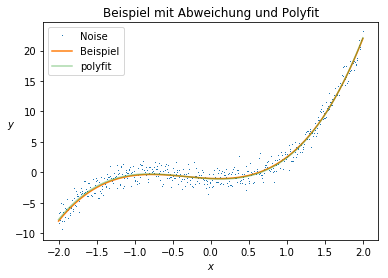

In [137]:
############################################################################################
# Aufgabenteil 2: Demonstrieren Sie die Funktion grafisch                                  #
############################################################################################ 

# Wir erstellen eine Beispiel Funktion 3-ten Grades
x_bsp = linspace(-2,2,500)                       # x-Werte im Intervall [-2,2]
y_bsp = 2*x_bsp**3 + 2*x_bsp**2 - 0.5*x_bsp - 1  # y-Werte im Intervall [-2,2]
plt.title("Beispiel")                            # gibt der Axes den Titel: "Beispiel"
plt.xlabel('$x$')                                # gibt der Axes das Label für die x-Achse: x
plt.ylabel('$y$', rotation=0)                    # gibt der Axes das Label für die y-Achse: y
plot(x_bsp,y_bsp,label="Beispiel")               # plottet die y- gegen die x-Werte
show()                                           # zeichnet die Funktion

# Nun erstellen wir basierend auf unserem Beispiel eine Funktion die Abweichungen aufweist
err = np.random.normal(loc=0.0, scale=1, size=500) # erstellt 500 normalverteilte 
                                                   # Zufallszahlen um 0
y_err = y_bsp + err                                # addiert diese Abweichung zu unseren
                                                   # y-Werten

plot(x_bsp,y_err, ',', label="Noise")              # plottet diese mit Messfehlern behafteten
                                                   # Messpunkte
plot(x_bsp,y_bsp,label="Beispiel")                 # plottet die Beispiel-Werte
plt.title("Beispiel mit Abweichung")               # gibt der Axes den Titel: "Beispiel"
plt.xlabel('$x$')                                  # gibt der Axes das Label für die x-Achse: x
plt.ylabel('$y$', rotation=0)                      # gibt der Axes das Label für die y-Achse: y
legend()                                           # erstellt Legende
show()                                             # zeichnet die Graphen

# Hier erstellen wir nun den polyfit
c = mypolyfit(x_bsp,y_err,N=3)                     # erstellt den Koeffizienten Vektor für den
                                                   # Polyfit
y_new = polycalc(c,x_bsp)                          # erstellt mithilfe des Koeffizienten-Vektors
                                                   # und der x-Werte, die y-Werte des 
                                                   # polyfit Polynoms
plt.title("Beispiel mit Abweichung und Polyfit")   # gibt der Axes den Titel: "Beispiel mit 
                                                   # Abweichung und Polyfit"
plt.xlabel('$x$')                                  # gibt der Axes das Label für die x-Achse: x
plt.ylabel('$y$', rotation=0)                      # gibt der Axes das Label für die y-Achse: y
plot(x_bsp,y_err, ',', label="Noise")              # plottet diese mit Messfehlern behafteten
                                                   # Messpunkte
plot(x_bsp,y_bsp, label="Beispiel")                # plottet die Beispiel-Werte
plot(x_bsp,y_new, label="polyfit", alpha=0.4)      # plottet den Polyfit
legend()                                           # erstellt die Legende
show()                                             # zeichnet die Graphen

# Die Polyfit Funktion stellt sich als sehr zufriedenstellend heraus

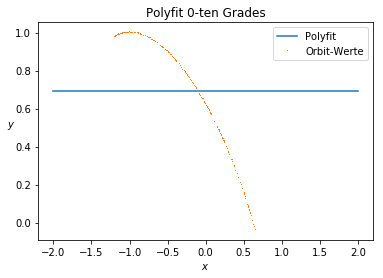

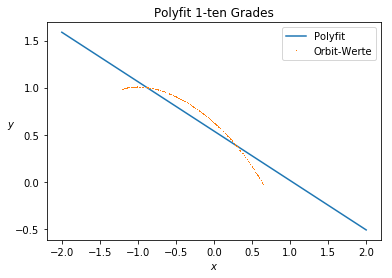

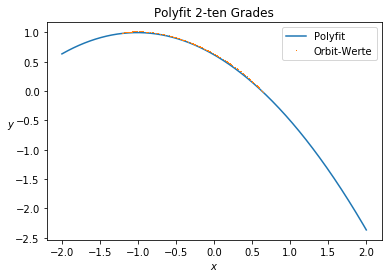

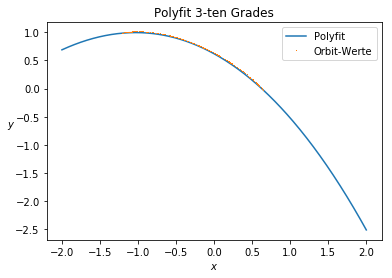

In [144]:
############################################################################################
# Aufgabenteil 3: Finden sie ein Polynom das die Werte aus Aufgabe 1 beschreibt            #
############################################################################################ 

# x- bzw. i-Werte gegn die wir unseren polyfit plotten
i = linspace(-2,2,500)

# Polynom 0-ten Grades
plt.title("Polyfit 0-ten Grades")   
plt.xlabel('$x$')                                 
plt.ylabel('$y$', rotation=0)  
plot(i,polycalc(mypolyfit(x,y,N=0),i), label="Polyfit")
plot(x,y,',', label="Orbit-Werte")
legend()
show()

# Polynom 1-ten Grades
plt.title("Polyfit 1-ten Grades")   
plt.xlabel('$x$')                                 
plt.ylabel('$y$', rotation=0)  
plot(i,polycalc(mypolyfit(x,y,N=1),i), label="Polyfit")
plot(x,y,',', label="Orbit-Werte")
legend()
show()

# Polynom 2-ten Grades
plt.title("Polyfit 2-ten Grades")   
plt.xlabel('$x$')                                 
plt.ylabel('$y$', rotation=0)  
plot(i,polycalc(mypolyfit(x,y,N=2),i), label="Polyfit")
plot(x,y,',', label="Orbit-Werte")
legend()
show()
# Dieser Fit ist schon sehr gut, doch zur sicherheit gehen wir noch einen Grad höher

# Polynom 3-ten Grades
plt.title("Polyfit 3-ten Grades")   
plt.xlabel('$x$')                                 
plt.ylabel('$y$', rotation=0)  
plot(i,polycalc(mypolyfit(x,y,N=3),i), label="Polyfit")
plot(x,y,',', label="Orbit-Werte")
legend()
show()
# Mit diesem Fit sollten die Werte zufriedenstellend beschrieben seien